# Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Access the dataset

In [4]:
data = pd.read_csv("Apply_Rate_2019.csv")
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,2018-01-23,-3623880078591607667
4,NaN,NaN,7.868900,0.008065,0.008772,0.0,7.0,0,2018-01-24,-7054510112423797411


In [5]:
data.shape

(1200890, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   title_proximity_tfidf        948319 non-null   float64
 1   description_proximity_tfidf  948319 non-null   float64
 2   main_query_tfidf             1200890 non-null  float64
 3   query_jl_score               1200890 non-null  float64
 4   query_title_score            1200890 non-null  float64
 5   city_match                   944335 non-null   float64
 6   job_age_days                 1200890 non-null  float64
 7   apply                        1200890 non-null  int64  
 8   search_date_pacific          1200890 non-null  object 
 9   class_id                     1200890 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


In [7]:
data.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
count,948319.000000,948319.000000,1.200890e+06,1.200890e+06,1.200890e+06,944335.000000,1.200890e+06,1.200890e+06,1.200890e+06
mean,5.889800,0.096119,1.770301e+00,1.711024e-02,3.580456e-02,0.563676,1.010130e+01,8.993580e-02,-3.956263e+17
std,9.749672,0.284249,2.237259e+00,1.220871e-02,4.886690e-02,0.495929,1.738912e+01,2.860899e-01,5.664017e+18
min,0.000000,0.000000,0.000000e+00,1.000000e-06,9.998021e-07,0.000000,0.000000e+00,0.000000e+00,-9.049388e+18
25%,0.000000,0.000000,0.000000e+00,1.063830e-02,1.256780e-02,0.000000,2.000000e+00,0.000000e+00,-4.593390e+18
50%,0.000000,0.000000,2.509947e-01,1.578868e-02,2.066189e-02,1.000000,6.000000e+00,0.000000e+00,-1.614083e+18
75%,11.642839,0.063633,3.423265e+00,2.043710e-02,3.760018e-02,1.000000,1.400000e+01,0.000000e+00,4.315422e+18
max,93.516720,7.301161,1.774189e+01,2.556893e-01,1.294088e+00,1.000000,1.340000e+03,1.000000e+00,9.204124e+18


# Missing Value Treatment

In [8]:
data.shape

(1200890, 10)

In [9]:
data.isnull().sum()

title_proximity_tfidf          252571
description_proximity_tfidf    252571
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     256555
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [10]:
#percentage of the null value data
round(data.loc[:,data.isnull().sum() > 0].isnull().sum()/len(data.index),2) * 100 

title_proximity_tfidf          21.0
description_proximity_tfidf    21.0
city_match                     21.0
dtype: float64

In [11]:
data[(data["title_proximity_tfidf"].isnull()) & (data["apply"] == 0)].shape

(235328, 10)

In [12]:
data["title_proximity_tfidf"].value_counts()

0.000000     647042
14.939764        21
17.811365        19
17.493496        15
19.385944        15
              ...  
8.676919          1
43.226490         1
10.559381         1
23.596730         1
24.738361         1
Name: title_proximity_tfidf, Length: 225538, dtype: int64

In [13]:
#title_proximity_tfidf,closeness of query and job description is closeness of query and job title and closeness of query and job description respectively. most of all are zero we fill missing value are zero 
data["title_proximity_tfidf"] = data["title_proximity_tfidf"].fillna(0.000000) 
data["description_proximity_tfidf"] = data["description_proximity_tfidf"].fillna(0.000000) 

In [14]:
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,2018-01-23,-3623880078591607667
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0,0,2018-01-24,-7054510112423797411


In [15]:
data.isnull().sum()

title_proximity_tfidf               0
description_proximity_tfidf         0
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     256555
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [16]:
data.isnull().sum()

title_proximity_tfidf               0
description_proximity_tfidf         0
main_query_tfidf                    0
query_jl_score                      0
query_title_score                   0
city_match                     256555
job_age_days                        0
apply                               0
search_date_pacific                 0
class_id                            0
dtype: int64

In [17]:
data[(data["city_match"] == 1) & (data["apply"] == 1)].shape

(46946, 10)

In [18]:
data[(data["city_match"] == 0) & (data["apply"] == 0)].shape

(376420, 10)

In [19]:
# we can say that most person are apply their city are matched and not city_match are 0
data[(data["city_match"].isnull()) & (data["apply"] == 0)] = data[(data["city_match"].isnull()) & (data["apply"] == 0)].fillna(0)

In [20]:
data[(data["city_match"].isnull()) & (data["apply"] == 1)] = data[(data["city_match"].isnull()) & (data["apply"] == 1)].fillna(1)

In [21]:
data["city_match"].value_counts()

0.0    643150
1.0    557740
Name: city_match, dtype: int64

In [22]:
data.isnull().sum()

title_proximity_tfidf          0
description_proximity_tfidf    0
main_query_tfidf               0
query_jl_score                 0
query_title_score              0
city_match                     0
job_age_days                   0
apply                          0
search_date_pacific            0
class_id                       0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   title_proximity_tfidf        1200890 non-null  float64
 1   description_proximity_tfidf  1200890 non-null  float64
 2   main_query_tfidf             1200890 non-null  float64
 3   query_jl_score               1200890 non-null  float64
 4   query_title_score            1200890 non-null  float64
 5   city_match                   1200890 non-null  float64
 6   job_age_days                 1200890 non-null  float64
 7   apply                        1200890 non-null  int64  
 8   search_date_pacific          1200890 non-null  object 
 9   class_id                     1200890 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


# Change DataType

In [24]:
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,2018-01-23,-3623880078591607667
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0,0,2018-01-24,-7054510112423797411


In [25]:
data["search_date_pacific"] =pd.to_datetime(data["search_date_pacific"],format='%Y-%m-%d')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   title_proximity_tfidf        1200890 non-null  float64       
 1   description_proximity_tfidf  1200890 non-null  float64       
 2   main_query_tfidf             1200890 non-null  float64       
 3   query_jl_score               1200890 non-null  float64       
 4   query_title_score            1200890 non-null  float64       
 5   city_match                   1200890 non-null  float64       
 6   job_age_days                 1200890 non-null  float64       
 7   apply                        1200890 non-null  int64         
 8   search_date_pacific          1200890 non-null  datetime64[ns]
 9   class_id                     1200890 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 91.6 MB


In [27]:
data.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,class_id
count,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06,1.200890e+06
mean,4.651058e+00,7.590343e-02,1.770301e+00,1.711024e-02,3.580456e-02,4.644389e-01,1.010130e+01,8.993580e-02,-3.956263e+17
std,8.990293e+00,2.556142e-01,2.237259e+00,1.220871e-02,4.886690e-02,4.987340e-01,1.738912e+01,2.860899e-01,5.664017e+18
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,9.998021e-07,0.000000e+00,0.000000e+00,0.000000e+00,-9.049388e+18
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.063830e-02,1.256780e-02,0.000000e+00,2.000000e+00,0.000000e+00,-4.593390e+18
50%,0.000000e+00,0.000000e+00,2.509947e-01,1.578868e-02,2.066189e-02,0.000000e+00,6.000000e+00,0.000000e+00,-1.614083e+18
75%,3.375564e+00,4.257227e-02,3.423265e+00,2.043710e-02,3.760018e-02,1.000000e+00,1.400000e+01,0.000000e+00,4.315422e+18
max,9.351672e+01,7.301161e+00,1.774189e+01,2.556893e-01,1.294088e+00,1.000000e+00,1.340000e+03,1.000000e+00,9.204124e+18


In [28]:
#visualising the numerical
#sns.pairplot(data)
#plt.show()

In [29]:
data.columns

Index(['title_proximity_tfidf', 'description_proximity_tfidf',
       'main_query_tfidf', 'query_jl_score', 'query_title_score', 'city_match',
       'job_age_days', 'apply', 'search_date_pacific', 'class_id'],
      dtype='object')

In [30]:
data.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0,0,2018-01-23,-3623880078591607667
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0,0,2018-01-24,-7054510112423797411


# Outliers Treatment

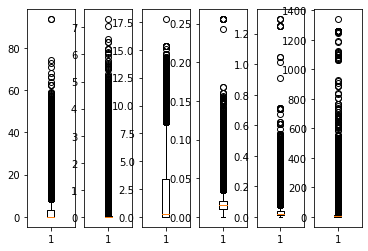

In [31]:
plt.subplot(1,6,1)
plt.boxplot(data['title_proximity_tfidf'])

plt.subplot(1,6,2)
plt.boxplot(data['description_proximity_tfidf'])

plt.subplot(1,6,3)
plt.boxplot(data['main_query_tfidf'])

plt.subplot(1,6,4)
plt.boxplot(data['query_jl_score'])

plt.subplot(1,6,5)
plt.boxplot(data['query_title_score'])

plt.subplot(1,6,6)
plt.boxplot(data['job_age_days'])

plt.show()

In [32]:
Q1 = data["title_proximity_tfidf"].quantile(0.05)
Q3 = data["title_proximity_tfidf"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["title_proximity_tfidf"] >= Q1 - 1.5*IQR) & (data["title_proximity_tfidf"] <= Q3 + 1.5*IQR)]

Q1 = data["description_proximity_tfidf"].quantile(0.05)
Q3 = data["description_proximity_tfidf"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["description_proximity_tfidf"] >= Q1 - 1.5*IQR) & (data["description_proximity_tfidf"] <= Q3 + 1.5*IQR)]

Q1 = data["main_query_tfidf"].quantile(0.05)
Q3 = data["main_query_tfidf"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["main_query_tfidf"] >= Q1 - 1.5*IQR) & (data["main_query_tfidf"] <= Q3 + 1.5*IQR)]

Q1 = data["query_jl_score"].quantile(0.05)
Q3 = data["query_jl_score"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["query_jl_score"] >= Q1 - 1.5*IQR) & (data["query_jl_score"] <= Q3 + 1.5*IQR)]

Q1 = data["query_title_score"].quantile(0.05)
Q3 = data["query_title_score"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["query_title_score"] >= Q1 - 1.5*IQR) & (data["query_title_score"] <= Q3 + 1.5*IQR)]

Q1 = data["job_age_days"].quantile(0.05)
Q3 = data["job_age_days"].quantile(0.95)
IQR = Q3 - Q1
data = data[(data["job_age_days"] >= Q1 - 1.5*IQR) & (data["job_age_days"] <= Q3 + 1.5*IQR)]

In [33]:
data.shape

(1160813, 10)

# Scale the Data

In [34]:
X = data.iloc[:,:-3]
y = data.iloc[:,-3]

In [35]:
X.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0


In [36]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: apply, dtype: int64

In [37]:
X.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
count,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06
mean,4.559350e+00,4.445749e-02,1.758086e+00,1.684282e-02,3.458276e-02,4.677523e-01,9.051271e+00
std,8.902353e+00,1.066351e-01,2.231874e+00,1.162584e-02,4.477255e-02,4.989592e-01,9.374325e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,9.998021e-07,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.060724e-02,1.246960e-02,0.000000e+00,2.000000e+00
50%,0.000000e+00,0.000000e+00,1.918011e-01,1.568699e-02,2.042185e-02,0.000000e+00,6.000000e+00
75%,0.000000e+00,3.821106e-02,3.386576e+00,2.010729e-02,3.714633e-02,1.000000e+00,1.400000e+01
max,6.403796e+01,8.441279e-01,1.507848e+01,9.815537e-02,3.120473e-01,1.000000e+00,6.500000e+01


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [39]:
X.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
0,0.000000,0.000000,0.000000,0.004824,0.006628,0.0,5.0
1,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0
2,11.874042,0.043637,2.527080,0.011935,0.011208,0.0,5.0
3,0.000000,0.000000,3.695809,0.013046,0.033340,0.0,5.0
4,0.000000,0.000000,7.868900,0.008065,0.008772,0.0,7.0


In [40]:
XScaled = scaler.fit_transform(X)

In [41]:
XScaled = pd.DataFrame(XScaled)
XScaled.columns = X.columns
XScaled.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
0,0.000000,0.000000,0.000000,0.049140,0.021237,0.0,0.076923
1,0.185422,0.051695,0.167595,0.121587,0.035915,0.0,0.076923
2,0.185422,0.051695,0.167595,0.121587,0.035915,0.0,0.076923
3,0.000000,0.000000,0.245105,0.132907,0.106841,0.0,0.076923
4,0.000000,0.000000,0.521863,0.082151,0.028108,0.0,0.107692


In [42]:
XScaled.describe()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
count,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06,1.160813e+06
mean,7.119761e-02,5.266677e-02,1.165957e-01,1.715850e-01,1.108225e-01,4.677523e-01,1.392503e-01
std,1.390168e-01,1.263257e-01,1.480172e-01,1.184444e-01,1.434805e-01,4.989592e-01,1.442204e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,1.080567e-01,3.995755e-02,0.000000e+00,3.076923e-02
50%,0.000000e+00,0.000000e+00,1.272019e-02,1.598094e-01,6.544174e-02,0.000000e+00,9.230769e-02
75%,0.000000e+00,4.526691e-02,2.245967e-01,2.048436e-01,1.190379e-01,1.000000e+00,2.153846e-01
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


## Train Test Split

In [43]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, 
                                                   train_size=0.9,
                                                   test_size = 0.1, random_state=100) # we have enough data so we select 90 percentage of test data

In [44]:
X_train.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match,job_age_days
789503,0.0,0.00000,0.205002,0.137679,0.033379,0.0,0.015385
1088493,0.0,0.20601,0.000000,0.095265,0.037336,0.0,0.307692
182728,0.0,0.00000,0.000000,0.287300,0.084005,0.0,0.246154
762310,0.0,0.00000,0.000000,0.150895,0.230420,1.0,0.015385
571077,0.0,0.00000,0.000000,0.176263,0.056009,1.0,0.076923


In [45]:
X_test.shape

(116082, 7)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [47]:
pca.components_

array([[ 0.03658239,  0.00875698,  0.05295821,  0.01103367,  0.02615651,
        -0.9974741 ,  0.00447027],
       [ 0.60475227,  0.13802101,  0.57541445,  0.19371379,  0.45904641,
         0.068912  ,  0.17642452],
       [ 0.00706656,  0.03171578,  0.29777004, -0.36054105, -0.51585008,
         0.00204532,  0.71706473],
       [-0.22426906, -0.11780147, -0.39636411,  0.41940597,  0.39593526,
        -0.01228871,  0.66776088],
       [ 0.0753223 ,  0.9421185 , -0.25100381,  0.14877137, -0.14298557,
        -0.00424539,  0.03377222],
       [-0.07244517,  0.16829267, -0.16650324, -0.78765906,  0.55990985,
        -0.00373987,  0.06918182],
       [ 0.75608738, -0.22378731, -0.57410443, -0.11799274, -0.17827587,
        -0.01045686,  0.05330382]])

In [48]:
pca.explained_variance_ratio_

array([0.6915078 , 0.1085594 , 0.05819764, 0.05376917, 0.0445618 ,
       0.02638482, 0.01701938])

In [49]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

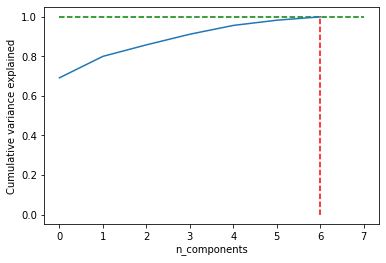

In [50]:
#Plotting the graph to identify best possible value for n_components
plt.vlines(x=6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=1.0, xmax=7, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel("n_components")
plt.ylabel("Cumulative variance explained")
plt.show()

From the above graph we can say that almost 100% data variance can be explained by 6 components, so we are going to selects n_componets as 6 for PCA

In [51]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)
X_train_pca = pca_final.fit_transform(X_train)

In [52]:
X_train_pca.shape

(1044731, 6)

In [53]:
X_test.shape

(116082, 7)

In [54]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(116082, 6)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
learner_pca = LogisticRegression()

In [57]:
model_pca = learner_pca.fit(X_train_pca, y_train)

In [58]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [59]:
pred_probs_test

array([[0.96254945, 0.03745055],
       [0.88565302, 0.11434698],
       [0.95646229, 0.04353771],
       ...,
       [0.95743854, 0.04256146],
       [0.87886641, 0.12113359],
       [0.96746174, 0.03253826]])

In [60]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.64'

# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Job Apply', "Job Apply"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [66]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.911915124563165


array([[950448,    767],
       [ 91258,   2258]], dtype=int64)

In [69]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.9110800985510242


array([[105526,     75],
       [ 10247,    234]], dtype=int64)